<a href="https://colab.research.google.com/github/SWAT-Brasil/util/blob/master/pcpswat/pcpswat_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotina para interpolação de precipitacao para SWAT em Google COLAB

Clique no icone do google colab acima para executar o programe.

Utilize ```SHIFT+ENTER``` para executar a célula.

In [7]:
# Verifica se esta rodando no COLAB e instala dependencias
def init_colab_env():
  """ prepara ambiente para uso no COLAB """
  !pip install geopandas
  !git clone https://github.com/SWAT-Brasil/util.git
  !cp util/pcpswat/pcpswat.py .

running_in_colab = 'google.colab' in str(get_ipython())
if running_in_colab:
  init_colab_env()
else:
    print('AVISO: Google Colab não detectado. Esse notebook pode não funcionar'\
     ' corretamente fora do Google Colab')

fatal: destination path 'util' already exists and is not an empty directory.


In [8]:
# Carrega pacotes do python. Voce pode instalar com o pip ou utilizando 
# anaconda. Anaconda é mais amigavel para uso e instalação dos pacotes, 
# e funciona bem em windows/linux
%matplotlib inline
import geopandas as gpd
import pyproj
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pcpswat
import io
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carrega dados

In [35]:
uploaded = files.upload()
file_name = next(iter(uploaded.keys()))

working_directory = './pcpswat_files'
with zipfile.ZipFile((io.BytesIO(uploaded[file_name])), 'r') as zip_ref:
    zip_ref.extractall(working_directory)

Saving exemplo_upload_colab.zip to exemplo_upload_colab (1).zip


# Interpolação

In [57]:
# Caminho para arquivos de entrada e diretorio de saida
# Neste diretorios estão alguns arquivos de exemplo
shape_file = os.path.join(working_directory,'shape/subs1.shp')
index_file = os.path.join(working_directory,'pcp/pcp.txt')
manual_pts_file = os.path.join(working_directory,'pcp/pcp_to_interpolate.txt')
output_folder = os.path.join(working_directory, './test/out')
output_folder = os.path.join(working_directory, 'out')
fig_file = os.path.join(output_folder, 'fig.png')
os.makedirs(output_folder, exist_ok=True)
method = 'nearest'


# verifica arquivos disponiveis de faz a configuracao
cfg_str = ''
if os.path.isfile(shape_file):
  cfg_str += ' -shape {}'.format(shape_file)
if os.path.isfile(manual_pts_file):
  cfg_str += ' -interpolate {}'.format(manual_pts_file)

# chama linha de comando para inteprpolar
!python pcpswat.py $index_file $output_folder $cfg_str -savefig -method $method


Ferramenta de interpolacao de precipitacao para SWAT 0.1.0
Pontos a interpolar definidos manualmente
Lendo ./pcpswat_files/pcp/pcp_to_interpolate.txt
Carregando arquivo shape
Carregando dados de precipitacao
Lendo ./pcpswat_files/pcp/pcp.txt
Lendo ./pcpswat_files/pcp/p83076.txt
Lendo ./pcpswat_files/pcp/p83179.txt
Lendo ./pcpswat_files/pcp/p83235.txt
Lendo ./pcpswat_files/pcp/p83236.txt
Lendo ./pcpswat_files/pcp/p1045006.txt
Lendo ./pcpswat_files/pcp/p1143005.txt
Lendo ./pcpswat_files/pcp/p1144005.txt
Lendo ./pcpswat_files/pcp/p1144027.txt
Lendo ./pcpswat_files/pcp/p1145001.txt
Lendo ./pcpswat_files/pcp/p1145004.txt
Lendo ./pcpswat_files/pcp/p1145013.txt
Lendo ./pcpswat_files/pcp/p1145014.txt
Lendo ./pcpswat_files/pcp/p1145019.txt
Lendo ./pcpswat_files/pcp/p1145020.txt
Lendo ./pcpswat_files/pcp/p1244011.txt
Lendo ./pcpswat_files/pcp/p1244019.txt
Lendo ./pcpswat_files/pcp/p1245004.txt
Lendo ./pcpswat_files/pcp/p1245014.txt
Lendo ./pcpswat_files/pcp/p1245015.txt
Lendo ./pcpswat_files/pcp

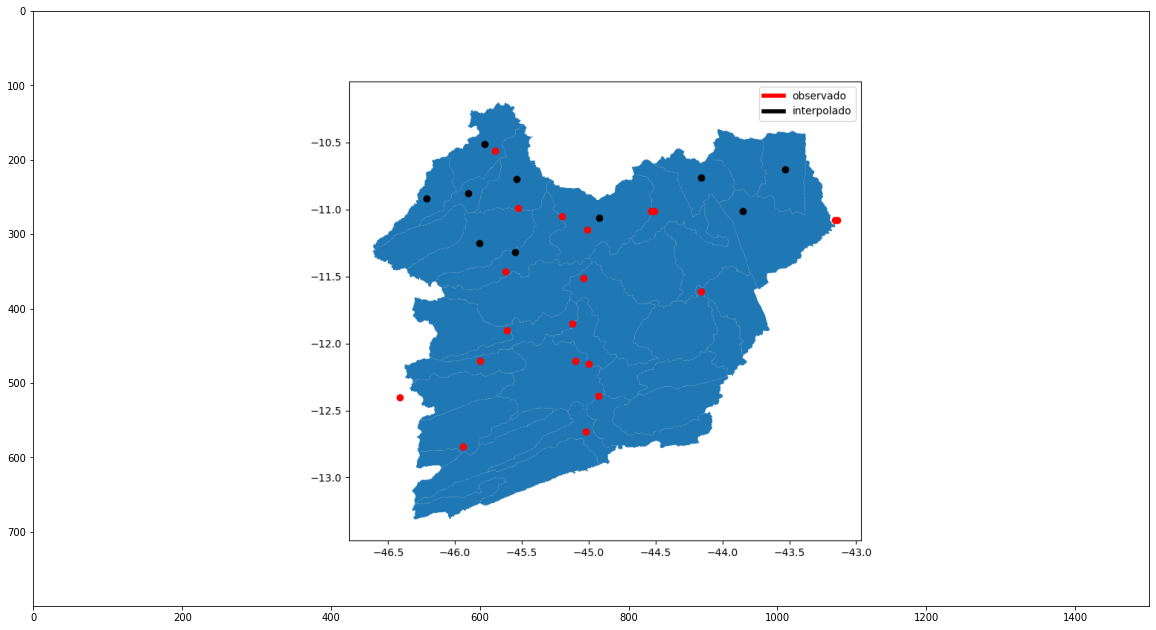

In [58]:
# Mostra figura
img = mpimg.imread(fig_file)
plt.subplots(1,figsize=(20,15))
imgplot = plt.imshow(img)

In [41]:
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

zipf = zipfile.ZipFile('pcpswat_colab.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir(working_directory, zipf)
zipf.close()
files.download('pcpswat_colab.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>